<img src = "https://upload.wikimedia.org/wikipedia/commons/e/e7/YuNaKimInVancouver.jpg" width = 400> </a>

<h2>Battling the Neighborhoods in L.A.: find a place for Korean    BBQ & Cafe</h2>


The goal of my project is to find a good place in the USA for Korean restaurants and coffee cafes. Champion figure skater Yuna Kim is funding a Korean food start-up restaurant and wants to be in a city suitable for patio weather and LA is a great place. The start-up is nterested in serving Korean BBQ one side of the venue with a division wall where they want have a donut shop that serves gourmet hot/cold teas and coffee. This project is intended to help with location.

I will survey the territory with 500 meters of Koreatown utilizing my Foursquare API connection and python notebooks along. The results will be prepared in the form of tables and interactive Geomap that shows the location of the ideal location and other areas of Coffee Shop saturation, and the neighborhood's most common venue should ideally be a Korean restaurant with few coffee shops.

<h1>STOP! View fully run project here 
<a href="https://nbviewer.jupyter.org/github/RobFaj/Capstone-DataScience/blob/master/Battling%20Neighborhoods_template_8.15-Copy1%20%281%29.ipynb">
Click here View fully run project here </a></h1>




In [1]:
#install conda geopy and folium
#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab

!pip install folium==0.5.0
#pip install geopy



     |████████████████████████████████| 81kB 7.2MB/s eta 0:00:011
  Stored in directory: /home/dsxuser/.cache/pip/wheels/f8/98/ff/954791afc47740d554f0d9e5885fa09dd60c2265d42578e665
Successfully built folium


In [2]:
!pip install plotly==4.9.0

     |████████████████████████████████| 12.9MB 5.2MB/s eta 0:00:01
  Found existing installation: plotly 3.6.1
    Uninstalling plotly-3.6.1:
      Successfully uninstalled plotly-3.6.1


In [3]:
!pip install geopy

In [2]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Libraries imported.


In [3]:
#!wget -q -O 'LA_data.json' https://services5.arcgis.com/7nsPwEMP38bSkCjy/arcgis/rest/services/LA_Times_Neighborhoods/FeatureServer/0/query?where=1%3D1&outFields=*&outSR=4326&f=json
#print('Data downloaded!')

In [4]:
#LA_data.head()

<h3> Understanding and Processing LA Neighborhood Data First</h3>

In [5]:
import pandas as pd
df_LA=pd.read_csv("https://usc.data.socrata.com/api/views/9utn-waje/rows.csv?accessType=DOWNLOAD&bom=true&format=true")
df_LA.head()

,set,slug,the_geom,kind,external_i,name,display_na,sqmi,type,name_1,slug_1,latitude,longitude,location
0,L.A. County Neighborhoods (Current),acton,MULTIPOLYGON (((-118.20261747920541 34.5389897...,L.A. County Neighborhood (Current),acton,Acton,Acton L.A. County Neighborhood (Current),39.339109,unincorporated-area,NaN,NaN,-118.169810,34.497355,POINT(34.497355239240846 -118.16981019229348)
1,L.A. County Neighborhoods (Current),adams-normandie,MULTIPOLYGON (((-118.30900800000012 34.0374109...,L.A. County Neighborhood (Current),adams-normandie,Adams-Normandie,Adams-Normandie L.A. County Neighborhood (Curr...,0.805350,segment-of-a-city,NaN,NaN,-118.300208,34.031461,POINT(34.031461499124156 -118.30020800000011)
2,L.A. County Neighborhoods (Current),agoura-hills,MULTIPOLYGON (((-118.76192500000009 34.1682029...,L.A. County Neighborhood (Current),agoura-hills,Agoura Hills,Agoura Hills L.A. County Neighborhood (Current),8.146760,standalone-city,NaN,NaN,-118.759885,34.146736,POINT(34.146736499122795 -118.75988450000015)
3,L.A. County Neighborhoods (Current),agua-dulce,MULTIPOLYGON (((-118.2546773959221 34.55830403...,L.A. County Neighborhood (Current),agua-dulce,Agua Dulce,Agua Dulce L.A. County Neighborhood (Current),31.462632,unincorporated-area,NaN,NaN,-118.317104,34.504927,POINT(34.504926999796837 -118.3171036690717)
4,L.A. County Neighborhoods (Current),alhambra,MULTIPOLYGON (((-118.12174700000014 34.1050399...,L.A. County Neighborhood (Current),alhambra,Alhambra,Alhambra L.A. County Neighborhood (Current),7.623814,standalone-city,NaN,NaN,-118.136512,34.085539,POINT(34.085538999123571 -118.13651200000021)


In [6]:
df1_LA = df_LA[['set','name','latitude','longitude']]

In [7]:
df1_LA.head()

,set,name,latitude,longitude
0,L.A. County Neighborhoods (Current),Acton,-118.169810,34.497355
1,L.A. County Neighborhoods (Current),Adams-Normandie,-118.300208,34.031461
2,L.A. County Neighborhoods (Current),Agoura Hills,-118.759885,34.146736
3,L.A. County Neighborhoods (Current),Agua Dulce,-118.317104,34.504927
4,L.A. County Neighborhoods (Current),Alhambra,-118.136512,34.085539


In [8]:
print('The LA dataframe has {} neighborhoods.'.format(
        len(df1_LA['name'].unique()),
        df1_LA.shape[0]
    )
)

The LA dataframe has 272 neighborhoods.


In [9]:
address = 'Los Angeles, CA'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Los Angeles are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Los Angeles are 34.0536909, -118.2427666.


In [10]:
LA_data = df1_LA[df1_LA['set'] == 'L.A. County Neighborhoods (Current)'].reset_index(drop=True)
LA_data.head()

,set,name,latitude,longitude
0,L.A. County Neighborhoods (Current),Acton,-118.169810,34.497355
1,L.A. County Neighborhoods (Current),Adams-Normandie,-118.300208,34.031461
2,L.A. County Neighborhoods (Current),Agoura Hills,-118.759885,34.146736
3,L.A. County Neighborhoods (Current),Agua Dulce,-118.317104,34.504927
4,L.A. County Neighborhoods (Current),Alhambra,-118.136512,34.085539


In [11]:
CLIENT_ID = 'EZNZI2RCAYZGJSRALET004Y44IDJLU3A4SOM44SM3ZVAQ3WC' # your Foursquare ID
CLIENT_SECRET = 'RM5YUKT10M10DOVAXQIMAAA2QOXQPU1ZOQEMF55SVNPNNOTD' # your Foursquare Secret
VERSION = '20180604' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: EZNZI2RCAYZGJSRALET004Y44IDJLU3A4SOM44SM3ZVAQ3WC
CLIENT_SECRET:RM5YUKT10M10DOVAXQIMAAA2QOXQPU1ZOQEMF55SVNPNNOTD


In [12]:
LA_data.loc[[28], 'name']

28    Koreatown
Name: name, dtype: object

In [13]:
neighborhood_latitude = LA_data.loc[28, 'longitude'] # neighborhood latitude value
neighborhood_longitude = LA_data.loc[28, 'latitude'] # neighborhood longitude value

neighborhood_name = LA_data.loc[28, 'name'] # neighborhood_name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of Koreatown are 34.06451049912376, -118.3049585.


In [14]:
# type your answer here
LIMIT=100 # number of venues

#define radius
radius = 4000

# create URL
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)
url # display URL


'https://api.foursquare.com/v2/venues/explore?&client_id=EZNZI2RCAYZGJSRALET004Y44IDJLU3A4SOM44SM3ZVAQ3WC&client_secret=RM5YUKT10M10DOVAXQIMAAA2QOXQPU1ZOQEMF55SVNPNNOTD&v=20180604&ll=34.06451049912376,-118.3049585&radius=4000&limit=100'

In [15]:
results = requests.get(url).json()

<h2>I know Koreatown is a great spot for nightlife!</h2>

In [16]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [17]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

,name,categories,lat,lng
0,Seoul Pho,Vietnamese Restaurant,34.065871,-118.308796
1,BCD Tofu House,Korean Restaurant,34.061961,-118.302713
2,Document Coffee Bar,Coffee Shop,34.061254,-118.311050
3,The Normandie Club,Hotel Bar,34.063555,-118.300856
4,Kang Ho Dong Baek Jeong,Korean Restaurant,34.063828,-118.297364


In [18]:
print('{} venues were returned by Foursquare for Koreatown area.'.format(nearby_venues.shape[0]))

100 venues were returned by Foursquare for Koreatown area.


## 2. Exploring the Neighborhoods in LA

In [19]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][28]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [20]:
nearby_venues.head()

,name,categories,lat,lng
0,Seoul Pho,Vietnamese Restaurant,34.065871,-118.308796
1,BCD Tofu House,Korean Restaurant,34.061961,-118.302713
2,Document Coffee Bar,Coffee Shop,34.061254,-118.311050
3,The Normandie Club,Hotel Bar,34.063555,-118.300856
4,Kang Ho Dong Baek Jeong,Korean Restaurant,34.063828,-118.297364


In [21]:
nearby_venues.groupby('categories').count()

,name,lat,lng
categories,,,
Argentinian Restaurant,1,1,1
Art Museum,1,1,1
Asian Restaurant,3,3,3
BBQ Joint,1,1,1
Bagel Shop,1,1,1
Bakery,1,1,1
Bar,1,1,1
Brazilian Restaurant,2,2,2
Burger Joint,3,3,3


In [22]:
print('There are {} uniques categories.'.format(len(nearby_venues['name'].unique())))

There are 99 uniques categories.


In [23]:
nearby_venues.shape

(100, 4)

In [24]:
nearby_venues.columns = ['Venue Name', 'Category', 'Lat', 'Lng']
nearby_venues.head()

,Venue Name,Category,Lat,Lng
0,Seoul Pho,Vietnamese Restaurant,34.065871,-118.308796
1,BCD Tofu House,Korean Restaurant,34.061961,-118.302713
2,Document Coffee Bar,Coffee Shop,34.061254,-118.311050
3,The Normandie Club,Hotel Bar,34.063555,-118.300856
4,Kang Ho Dong Baek Jeong,Korean Restaurant,34.063828,-118.297364


<h3>Make Bar Charts Here of Top Restaurants</h3>

In [25]:
# use the inline backend to generate the plots within the browser
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot') # optional: for ggplot-like style

# check for latest version of Matplotlib
print ('Matplotlib version: ', mpl.__version__) # >= 2.0.0

Matplotlib version:  3.0.2


In [26]:
test=nearby_venues
test.head()

,Venue Name,Category,Lat,Lng
0,Seoul Pho,Vietnamese Restaurant,34.065871,-118.308796
1,BCD Tofu House,Korean Restaurant,34.061961,-118.302713
2,Document Coffee Bar,Coffee Shop,34.061254,-118.311050
3,The Normandie Club,Hotel Bar,34.063555,-118.300856
4,Kang Ho Dong Baek Jeong,Korean Restaurant,34.063828,-118.297364


In [27]:
# add neighborhood_name column back to dataframe
test['Neighborhood_name'] = LA_data['name'] 

In [28]:
# step 1 get data set and ready 
LA_Korea=test[['Neighborhood_name','Category']]

In [29]:
LA_Korea.head()

,Neighborhood_name,Category
0,Acton,Vietnamese Restaurant
1,Adams-Normandie,Korean Restaurant
2,Agoura Hills,Coffee Shop
3,Agua Dulce,Hotel Bar
4,Alhambra,Korean Restaurant


In [30]:
LA_Korea.shape

(100, 2)

Text(0, 0.5, 'Frequency')

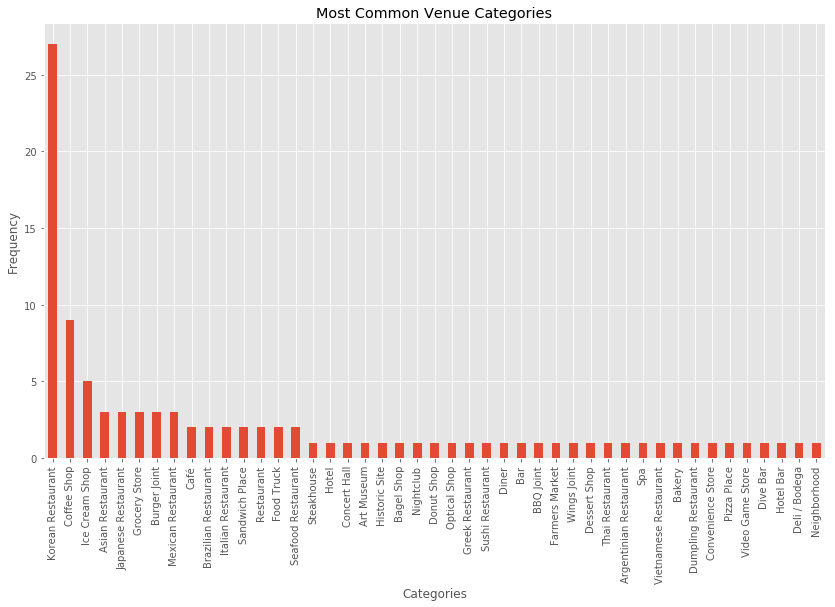

In [31]:
ax = LA_Korea['Category'].value_counts().plot(kind='bar',
                                    figsize=(14,8),
                                    title="Most Common Venue Categories")
ax.set_xlabel("Categories")
ax.set_ylabel("Frequency")

In [32]:
LA_onehot = pd.get_dummies(nearby_venues['Category'], prefix="", prefix_sep="")

In [33]:
# add neighborhood_name column back to dataframe
LA_onehot['Neighborhood_name'] = LA_data['name'] 
LA_onehot.head()

,Argentinian Restaurant,Art Museum,Asian Restaurant,BBQ Joint,Bagel Shop,Bakery,Bar,Brazilian Restaurant,Burger Joint,Café,Coffee Shop,Concert Hall,Convenience Store,Deli / Bodega,Dessert Shop,Diner,Dive Bar,Donut Shop,Dumpling Restaurant,Farmers Market,Food Truck,Greek Restaurant,Grocery Store,Historic Site,Hotel,Hotel Bar,Ice Cream Shop,Italian Restaurant,Japanese Restaurant,Korean Restaurant,Mexican Restaurant,Neighborhood,Nightclub,Optical Shop,Pizza Place,Restaurant,Sandwich Place,Seafood Restaurant,Spa,Steakhouse,Sushi Restaurant,Thai Restaurant,Video Game Store,Vietnamese Restaurant,Wings Joint,Neighborhood_name
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,Acton
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Adams-Normandie
2,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Agoura Hills
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Agua Dulce
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Alhambra


In [34]:
# I'm getting somewhere stopped here 


# move neighborhood column to the first column
fixed_columns = [LA_onehot.columns[-1]] + list(LA_onehot.columns[:-1])
LA_onehot = LA_onehot[fixed_columns]

LA_onehot.head()

,Neighborhood_name,Argentinian Restaurant,Art Museum,Asian Restaurant,BBQ Joint,Bagel Shop,Bakery,Bar,Brazilian Restaurant,Burger Joint,Café,Coffee Shop,Concert Hall,Convenience Store,Deli / Bodega,Dessert Shop,Diner,Dive Bar,Donut Shop,Dumpling Restaurant,Farmers Market,Food Truck,Greek Restaurant,Grocery Store,Historic Site,Hotel,Hotel Bar,Ice Cream Shop,Italian Restaurant,Japanese Restaurant,Korean Restaurant,Mexican Restaurant,Neighborhood,Nightclub,Optical Shop,Pizza Place,Restaurant,Sandwich Place,Seafood Restaurant,Spa,Steakhouse,Sushi Restaurant,Thai Restaurant,Video Game Store,Vietnamese Restaurant,Wings Joint
0,Acton,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,Adams-Normandie,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Agoura Hills,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Agua Dulce,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Alhambra,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [35]:
#grouped = venues_onehot.groupby('Street').mean().reset_index()
#grouped


LA_venues_grouped= LA_onehot.groupby('Neighborhood_name').mean().reset_index()
LA_venues_grouped.head()

,Neighborhood_name,Argentinian Restaurant,Art Museum,Asian Restaurant,BBQ Joint,Bagel Shop,Bakery,Bar,Brazilian Restaurant,Burger Joint,Café,Coffee Shop,Concert Hall,Convenience Store,Deli / Bodega,Dessert Shop,Diner,Dive Bar,Donut Shop,Dumpling Restaurant,Farmers Market,Food Truck,Greek Restaurant,Grocery Store,Historic Site,Hotel,Hotel Bar,Ice Cream Shop,Italian Restaurant,Japanese Restaurant,Korean Restaurant,Mexican Restaurant,Neighborhood,Nightclub,Optical Shop,Pizza Place,Restaurant,Sandwich Place,Seafood Restaurant,Spa,Steakhouse,Sushi Restaurant,Thai Restaurant,Video Game Store,Vietnamese Restaurant,Wings Joint
0,Acton,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,Adams-Normandie,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Agoura Hills,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Agua Dulce,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Alhambra,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [36]:
LA_venues_grouped.shape

(100, 46)

In [37]:
num_top_venues = 5

for hood in LA_venues_grouped['Neighborhood_name']:
    print("----"+hood+"----")
    temp = LA_venues_grouped[LA_venues_grouped['Neighborhood_name'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Acton----
                    venue  freq
0   Vietnamese Restaurant   1.0
1  Argentinian Restaurant   0.0
2            Optical Shop   0.0
3               Hotel Bar   0.0
4          Ice Cream Shop   0.0


----Adams-Normandie----
                    venue  freq
0       Korean Restaurant   1.0
1  Argentinian Restaurant   0.0
2           Historic Site   0.0
3               Hotel Bar   0.0
4          Ice Cream Shop   0.0


----Agoura Hills----
                    venue  freq
0             Coffee Shop   1.0
1  Argentinian Restaurant   0.0
2             Pizza Place   0.0
3               Hotel Bar   0.0
4          Ice Cream Shop   0.0


----Agua Dulce----
                    venue  freq
0               Hotel Bar   1.0
1  Argentinian Restaurant   0.0
2           Historic Site   0.0
3          Ice Cream Shop   0.0
4      Italian Restaurant   0.0


----Alhambra----
                    venue  freq
0       Korean Restaurant   1.0
1  Argentinian Restaurant   0.0
2           Historic Site   0.0
3

                    venue  freq
0     Japanese Restaurant   1.0
1  Argentinian Restaurant   0.0
2           Historic Site   0.0
3               Hotel Bar   0.0
4          Ice Cream Shop   0.0


----Chatsworth Reservoir----
                    venue  freq
0              Food Truck   1.0
1  Argentinian Restaurant   0.0
2            Optical Shop   0.0
3               Hotel Bar   0.0
4          Ice Cream Shop   0.0


----Chesterfield Square----
                    venue  freq
0     Japanese Restaurant   1.0
1  Argentinian Restaurant   0.0
2           Historic Site   0.0
3               Hotel Bar   0.0
4          Ice Cream Shop   0.0


----Cheviot Hills----
                    venue  freq
0        Sushi Restaurant   1.0
1  Argentinian Restaurant   0.0
2            Optical Shop   0.0
3               Hotel Bar   0.0
4          Ice Cream Shop   0.0


----Chinatown----
                    venue  freq
0       Korean Restaurant   1.0
1  Argentinian Restaurant   0.0
2           Historic Site   0.0

                    venue  freq
0              Restaurant   1.0
1  Argentinian Restaurant   0.0
2            Optical Shop   0.0
3               Hotel Bar   0.0
4          Ice Cream Shop   0.0


----Glassell Park----
                    venue  freq
0          Farmers Market   1.0
1  Argentinian Restaurant   0.0
2            Optical Shop   0.0
3               Hotel Bar   0.0
4          Ice Cream Shop   0.0


----Glendale----
                    venue  freq
0               Nightclub   1.0
1  Argentinian Restaurant   0.0
2           Historic Site   0.0
3               Hotel Bar   0.0
4          Ice Cream Shop   0.0


----Glendora----
                    venue  freq
0             Coffee Shop   1.0
1  Argentinian Restaurant   0.0
2             Pizza Place   0.0
3               Hotel Bar   0.0
4          Ice Cream Shop   0.0


----Gramercy Park----
                    venue  freq
0             Coffee Shop   1.0
1  Argentinian Restaurant   0.0
2             Pizza Place   0.0
3               Ho

In [38]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]


In [39]:
num_top_venues = 5

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood_name']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood_name'] = LA_venues_grouped['Neighborhood_name']

for ind in np.arange(LA_venues_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(LA_venues_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head(20)

,Neighborhood_name,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Acton,Vietnamese Restaurant,Concert Hall,Food Truck,Farmers Market,Dumpling Restaurant
1,Adams-Normandie,Korean Restaurant,Wings Joint,Concert Hall,Farmers Market,Dumpling Restaurant
2,Agoura Hills,Coffee Shop,Greek Restaurant,Farmers Market,Dumpling Restaurant,Donut Shop
3,Agua Dulce,Hotel Bar,Wings Joint,Concert Hall,Farmers Market,Dumpling Restaurant
4,Alhambra,Korean Restaurant,Wings Joint,Concert Hall,Farmers Market,Dumpling Restaurant
5,Alondra Park,Concert Hall,Wings Joint,Greek Restaurant,Farmers Market,Dumpling Restaurant
6,Altadena,Grocery Store,Greek Restaurant,Farmers Market,Dumpling Restaurant,Donut Shop
7,Angeles Crest,Korean Restaurant,Wings Joint,Concert Hall,Farmers Market,Dumpling Restaurant
8,Arcadia,Brazilian Restaurant,Wings Joint,Concert Hall,Farmers Market,Dumpling Restaurant
9,Arleta,Burger Joint,Wings Joint,Concert Hall,Farmers Market,Dumpling Restaurant


In [40]:
#select neighborhoods where 1stMost Common Venue Korean rest. and 2nd most common venue is Coffee Shop
#I need to establish a venue of Korean BBQ and Boba tea in the area.

df_Korean1st= neighborhoods_venues_sorted.loc[neighborhoods_venues_sorted['1st Most Common Venue'] == 'Korean Restaurant']

df_Korean1st.head()

,Neighborhood_name,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
1,Adams-Normandie,Korean Restaurant,Wings Joint,Concert Hall,Farmers Market,Dumpling Restaurant
4,Alhambra,Korean Restaurant,Wings Joint,Concert Hall,Farmers Market,Dumpling Restaurant
7,Angeles Crest,Korean Restaurant,Wings Joint,Concert Hall,Farmers Market,Dumpling Restaurant
10,Arlington Heights,Korean Restaurant,Wings Joint,Concert Hall,Farmers Market,Dumpling Restaurant
11,Artesia,Korean Restaurant,Wings Joint,Concert Hall,Farmers Market,Dumpling Restaurant


In [41]:
df_Coffee1st= neighborhoods_venues_sorted.loc[neighborhoods_venues_sorted['1st Most Common Venue'] == 'Coffee Shop']

df_Coffee1st.head()

,Neighborhood_name,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
2,Agoura Hills,Coffee Shop,Greek Restaurant,Farmers Market,Dumpling Restaurant,Donut Shop
35,Carthay,Coffee Shop,Greek Restaurant,Farmers Market,Dumpling Restaurant,Donut Shop
50,Compton,Coffee Shop,Greek Restaurant,Farmers Market,Dumpling Restaurant,Donut Shop
67,East Pasadena,Coffee Shop,Greek Restaurant,Farmers Market,Dumpling Restaurant,Donut Shop
77,Exposition Park,Coffee Shop,Greek Restaurant,Farmers Market,Dumpling Restaurant,Donut Shop


In [42]:
df_Coff_Kor= [df_Korean1st,df_Coffee1st]
result = pd.concat(df_Coff_Kor)

result.head()

,Neighborhood_name,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
1,Adams-Normandie,Korean Restaurant,Wings Joint,Concert Hall,Farmers Market,Dumpling Restaurant
4,Alhambra,Korean Restaurant,Wings Joint,Concert Hall,Farmers Market,Dumpling Restaurant
7,Angeles Crest,Korean Restaurant,Wings Joint,Concert Hall,Farmers Market,Dumpling Restaurant
10,Arlington Heights,Korean Restaurant,Wings Joint,Concert Hall,Farmers Market,Dumpling Restaurant
11,Artesia,Korean Restaurant,Wings Joint,Concert Hall,Farmers Market,Dumpling Restaurant


In [43]:
result_location = result.join(LA_data.set_index('name'), on='Neighborhood_name')
result_location.head()

,Neighborhood_name,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,set,latitude,longitude
1,Adams-Normandie,Korean Restaurant,Wings Joint,Concert Hall,Farmers Market,Dumpling Restaurant,L.A. County Neighborhoods (Current),-118.300208,34.031461
4,Alhambra,Korean Restaurant,Wings Joint,Concert Hall,Farmers Market,Dumpling Restaurant,L.A. County Neighborhoods (Current),-118.136512,34.085539
7,Angeles Crest,Korean Restaurant,Wings Joint,Concert Hall,Farmers Market,Dumpling Restaurant,L.A. County Neighborhoods (Current),-117.922395,34.313937
10,Arlington Heights,Korean Restaurant,Wings Joint,Concert Hall,Farmers Market,Dumpling Restaurant,L.A. County Neighborhoods (Current),-118.323408,34.044910
11,Artesia,Korean Restaurant,Wings Joint,Concert Hall,Farmers Market,Dumpling Restaurant,L.A. County Neighborhoods (Current),-118.080101,33.866896


In [44]:
#df results
result_location['lng'] = result_location['latitude'] 
result_location.head()




,Neighborhood_name,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,set,latitude,longitude,lng
1,Adams-Normandie,Korean Restaurant,Wings Joint,Concert Hall,Farmers Market,Dumpling Restaurant,L.A. County Neighborhoods (Current),-118.300208,34.031461,-118.300208
4,Alhambra,Korean Restaurant,Wings Joint,Concert Hall,Farmers Market,Dumpling Restaurant,L.A. County Neighborhoods (Current),-118.136512,34.085539,-118.136512
7,Angeles Crest,Korean Restaurant,Wings Joint,Concert Hall,Farmers Market,Dumpling Restaurant,L.A. County Neighborhoods (Current),-117.922395,34.313937,-117.922395
10,Arlington Heights,Korean Restaurant,Wings Joint,Concert Hall,Farmers Market,Dumpling Restaurant,L.A. County Neighborhoods (Current),-118.323408,34.044910,-118.323408
11,Artesia,Korean Restaurant,Wings Joint,Concert Hall,Farmers Market,Dumpling Restaurant,L.A. County Neighborhoods (Current),-118.080101,33.866896,-118.080101


In [45]:

result_location['lat'] = result_location['longitude'] 
result_location.head()

,Neighborhood_name,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,set,latitude,longitude,lng,lat
1,Adams-Normandie,Korean Restaurant,Wings Joint,Concert Hall,Farmers Market,Dumpling Restaurant,L.A. County Neighborhoods (Current),-118.300208,34.031461,-118.300208,34.031461
4,Alhambra,Korean Restaurant,Wings Joint,Concert Hall,Farmers Market,Dumpling Restaurant,L.A. County Neighborhoods (Current),-118.136512,34.085539,-118.136512,34.085539
7,Angeles Crest,Korean Restaurant,Wings Joint,Concert Hall,Farmers Market,Dumpling Restaurant,L.A. County Neighborhoods (Current),-117.922395,34.313937,-117.922395,34.313937
10,Arlington Heights,Korean Restaurant,Wings Joint,Concert Hall,Farmers Market,Dumpling Restaurant,L.A. County Neighborhoods (Current),-118.323408,34.044910,-118.323408,34.044910
11,Artesia,Korean Restaurant,Wings Joint,Concert Hall,Farmers Market,Dumpling Restaurant,L.A. County Neighborhoods (Current),-118.080101,33.866896,-118.080101,33.866896


In [46]:

result_location['First_Most_Common_Venue'] = result_location['1st Most Common Venue'] 
result_location.head()

,Neighborhood_name,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,set,latitude,longitude,lng,lat,First_Most_Common_Venue
1,Adams-Normandie,Korean Restaurant,Wings Joint,Concert Hall,Farmers Market,Dumpling Restaurant,L.A. County Neighborhoods (Current),-118.300208,34.031461,-118.300208,34.031461,Korean Restaurant
4,Alhambra,Korean Restaurant,Wings Joint,Concert Hall,Farmers Market,Dumpling Restaurant,L.A. County Neighborhoods (Current),-118.136512,34.085539,-118.136512,34.085539,Korean Restaurant
7,Angeles Crest,Korean Restaurant,Wings Joint,Concert Hall,Farmers Market,Dumpling Restaurant,L.A. County Neighborhoods (Current),-117.922395,34.313937,-117.922395,34.313937,Korean Restaurant
10,Arlington Heights,Korean Restaurant,Wings Joint,Concert Hall,Farmers Market,Dumpling Restaurant,L.A. County Neighborhoods (Current),-118.323408,34.044910,-118.323408,34.044910,Korean Restaurant
11,Artesia,Korean Restaurant,Wings Joint,Concert Hall,Farmers Market,Dumpling Restaurant,L.A. County Neighborhoods (Current),-118.080101,33.866896,-118.080101,33.866896,Korean Restaurant


In [47]:
#finalizing preparation of result_location dataset for mapping

result_location_new = result_location[['Neighborhood_name', 'First_Most_Common_Venue', 'lng', 'lat']]
result_location_new.head()

,Neighborhood_name,First_Most_Common_Venue,lng,lat
1,Adams-Normandie,Korean Restaurant,-118.300208,34.031461
4,Alhambra,Korean Restaurant,-118.136512,34.085539
7,Angeles Crest,Korean Restaurant,-117.922395,34.313937
10,Arlington Heights,Korean Restaurant,-118.323408,34.044910
11,Artesia,Korean Restaurant,-118.080101,33.866896


In [48]:
result_location_new.shape

(36, 4)

<h2> Based on the above table, Acton is the only predominantly location for Korean Restaurants.</h2>
Conveniently, coffee shops are not on their top 5 lists of venues. 

__Make a Map of the Neighborhoods and Venues within top two picks__


<h3> Make maps here</h3>

In [49]:
venues_map = folium.Map(location=[latitude, longitude], zoom_start=8) # generate map centred around the Conrad Hotel

# add a red circle marker to represent the Acton
#folium.features.CircleMarker(
 #   [lat, lng],
  #  radius=10,
   # color='red',
    #popup='Citrus',
#    fill = True,
 #   fill_color = 'red',
  #  fill_opacity = 0.6
# ).add_to(venues_map)

folium.Marker(
    location=[34.497355, -118.169810],
    popup='Koreatown, Los Angeles',
    icon=folium.Icon(color='red', icon='info-sign')
).add_to(venues_map)

# add the Italian restaurants as blue circle markers
for lat, lng, Neighborhood_name in zip(result_location_new.lat, result_location_new.lng, result_location_new.Neighborhood_name):
    folium.features.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        #popup=label,
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(venues_map)



# display map
venues_map

In [50]:
# Assinging a color code to coffee shop and Korean Restaurant locations.

from sklearn.preprocessing import LabelEncoder

lb_make = LabelEncoder()
result_location_new["color_code"] = lb_make.fit_transform(result_location_new["First_Most_Common_Venue"])
result_location_new[["color_code", "First_Most_Common_Venue","Neighborhood_name", "lat", "lng" ]]

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,color_code,First_Most_Common_Venue,Neighborhood_name,lat,lng
1,1,Korean Restaurant,Adams-Normandie,34.031461,-118.300208
4,1,Korean Restaurant,Alhambra,34.085539,-118.136512
7,1,Korean Restaurant,Angeles Crest,34.313937,-117.922395
10,1,Korean Restaurant,Arlington Heights,34.044910,-118.323408
11,1,Korean Restaurant,Artesia,33.866896,-118.080101
14,1,Korean Restaurant,Avalon,33.336954,-118.327332
15,1,Korean Restaurant,Avocado Heights,34.040881,-118.001261
18,1,Korean Restaurant,Baldwin Park,34.081109,-117.975191
22,1,Korean Restaurant,Bellflower,33.888013,-118.129032
23,1,Korean Restaurant,Beverly Crest,34.106007,-118.423263


<h4>Stopped here on August 21st. Explore thismap idea. (https://medium.com/@madhuramiah/geographic-plotting-with-python-folium-2f235cc167b7). </h4>

In [51]:

#location=result_location_new.groupby(['lat','lng','color_code']).size().reset_index(name='count').sort_values(by='count',ascending=False)
#location=location[location['count']>1]
#location['color']=result_location_new['color_code'].apply(lambda black if color==0 else
                                         "green")
#location['size']=location['count'].apply(lambda count:12 if count>=400 else
 #                                        10 if count>=300 and count<400 else
  #                                       8 if count>=200 and count<300 else
   #                                      6 if count>=150 and count<200 else
    #                                     4 if count>=100 and count<150 else
                                         #2 )
#location

IndentationError: unexpected indent (<ipython-input-51-49ff3f198baf>, line 5)

In [ ]:
result_location_new.head()

In [ ]:
import plotly.graph_objects as go

import pandas as pd

In [ ]:
fig = go.Figure(data=go.Scattergeo(
        lon = result_location_new['lng'],
        lat = result_location_new['lat'],
        text = result_location_new['Neighborhood_name'],
        #text = result_location_new['First_Most_Common_Venue'],
        mode = 'markers',
        marker_color = result_location_new['color_code'],
        ))


fig.update_layout(
        title = 'Interactive: Korean Restaurant, yellow and Coffee Shop Venues, blue',
        geo_scope='usa',
    )
fig.show()

<h1> Based on these mapped results, we find that <b>Griffith Park</b> is the perfect location for our Korean Barbeque/Coffee shop venue.  
 
   </h1>
      <h3> As we zoom in closer to the Interactive Table above, we will find that Griffith Park is located between a cluster of predominantly coffee shop neighborhoods in the southwest and only one predominantly coffee shop neighborhood (Glendale) in the northeastern vicinty from Griffith Park.  While this nieghborhood is predominantly Korean Restaurant venues, we want to make it convenient for our customers and bring the coffee shop experience closer.</h3> 
       
       


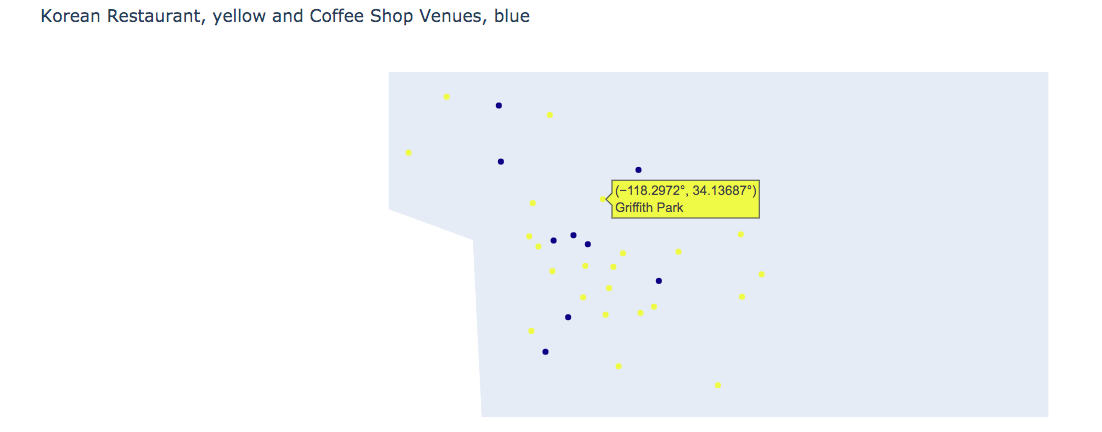